<a href="https://colab.research.google.com/github/fais0101/Random-Forest-Stock-Price-Prediction/blob/main/Stock_market_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas yfinance scikit-learn matplotlib pandas_market_calendars
import pandas_market_calendars as mcal
import yfinance as yf
import math
from sklearn.model_selection import train_test_split


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.0/198.0 kB 12.5 MB/s eta 0:00:00


# **Train Model**

In [2]:
import yfinance as yf
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [41]:
ticker = 'AMZN' #change your ticker here

ticker_data = yf.Ticker(ticker)
df_history = ticker_data.history(period='1y')

df_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-07 00:00:00-05:00,169.479996,170.880005,168.940002,170.529999,47174100,0.0,0.0
2024-02-08 00:00:00-05:00,169.649994,171.429993,168.880005,169.839996,42316500,0.0,0.0
2024-02-09 00:00:00-05:00,170.899994,175.000000,170.580002,174.449997,56986000,0.0,0.0
2024-02-12 00:00:00-05:00,174.800003,175.389999,171.539993,172.339996,51050400,0.0,0.0
2024-02-13 00:00:00-05:00,167.729996,170.949997,165.750000,168.639999,56345100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,234.059998,239.250000,232.899994,237.419998,37285900,0.0,0.0
2025-02-04 00:00:00-05:00,239.009995,242.520004,238.029999,242.059998,29713800,0.0,0.0
2025-02-05 00:00:00-05:00,237.020004,238.320007,235.199997,236.169998,38727300,0.0,0.0


In [42]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-02-07 00:00:00-05:00 to 2025-02-07 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Volume        252 non-null    int64  
 5   Dividends     252 non-null    float64
 6   Stock Splits  252 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.8 KB


In [43]:
X = df_history.drop('Close', axis=1)
y = df_history['Close']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

rfr = RandomForestRegressor(random_state=13)

(201, 6) (51, 6) (201,) (51,)


In [45]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=13)

In [46]:
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [47]:
y_pred = rfr.predict(X_test)

In [48]:
y_test

,Close
Date,
2025-01-27 00:00:00-05:00,235.419998
2024-07-24 00:00:00-04:00,180.830002
2024-10-04 00:00:00-04:00,186.509995
2024-11-25 00:00:00-05:00,201.449997
2024-11-27 00:00:00-05:00,205.740005
2024-11-29 00:00:00-05:00,207.889999
2024-07-29 00:00:00-04:00,183.199997
2024-06-26 00:00:00-04:00,193.610001
2024-12-19 00:00:00-05:00,223.289993


<Axes: title={'center': 'Comparison of Predicted vs. Actual stock price'}, xlabel='Date', ylabel='Stock Price ($)'>

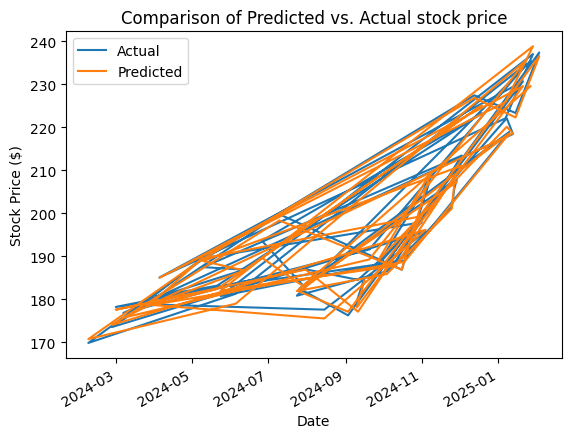

In [49]:
predicted_and_actual_values = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_and_actual_values.plot(title='Comparison of Predicted vs. Actual stock price', ylabel='Stock Price ($)', xlabel='Date')


In [50]:
predicted_and_actual_values

,Actual,Predicted
Date,,
2025-01-27 00:00:00-05:00,235.419998,229.576884
2024-07-24 00:00:00-04:00,180.830002,181.905801
2024-10-04 00:00:00-04:00,186.509995,185.879602
2024-11-25 00:00:00-05:00,201.449997,201.096699
2024-11-27 00:00:00-05:00,205.740005,206.882199
2024-11-29 00:00:00-05:00,207.889999,207.297899
2024-07-29 00:00:00-04:00,183.199997,183.068704
2024-06-26 00:00:00-04:00,193.610001,189.638201
2024-12-19 00:00:00-05:00,223.289993,225.140500


In [51]:
rfr

RandomForestRegressor(random_state=13)

In [52]:
mean_absolute_error(y_pred, y_test)

1.2845636405196847

In [53]:
mean_squared_error(y_pred, y_test)

3.574230116265498

In [54]:
r2_score(y_pred, y_test)

0.990640489585242

In [55]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [56]:
df_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-07 00:00:00-05:00,169.479996,170.880005,168.940002,170.529999,47174100,0.0,0.0
2024-02-08 00:00:00-05:00,169.649994,171.429993,168.880005,169.839996,42316500,0.0,0.0
2024-02-09 00:00:00-05:00,170.899994,175.000000,170.580002,174.449997,56986000,0.0,0.0
2024-02-12 00:00:00-05:00,174.800003,175.389999,171.539993,172.339996,51050400,0.0,0.0
2024-02-13 00:00:00-05:00,167.729996,170.949997,165.750000,168.639999,56345100,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,234.059998,239.250000,232.899994,237.419998,37285900,0.0,0.0
2025-02-04 00:00:00-05:00,239.009995,242.520004,238.029999,242.059998,29713800,0.0,0.0
2025-02-05 00:00:00-05:00,237.020004,238.320007,235.199997,236.169998,38727300,0.0,0.0


# **Predict future moving averages **
 - Predicts the future price from the moving average of features from last 5 days.
- Then adds the new predicted features to the existing historical data for new price prediction

In [57]:
def append_prediction(df, next_day_features):

  #we need to add tomorrows date to the next_day_features
  date = df[-1:].index
  next_date = date + pd.Timedelta(days=1)
  expected_features = ['Date','Open', 'High', 'Low', 'Close','Volume','Dividends', 'Stock Splits']

  next_day_features['Date'] = next_date
  next_day_features = next_day_features[expected_features]
  next_day_features.set_index('Date', inplace=True)
  #print(next_day_features)

  df = pd.concat([df,next_day_features], axis=0, ignore_index=False)

  return df



def predict_next_day_features(df):

    # Calculate the moving average for the last 5 days and return it as a single sample (1, number of features)
    moving_average = df[-5:].mean().to_frame().T  # Transpose to shape (1, number of features)

    # Ensure the order of columns matches exactly with the training data's features
    expected_features = ['Open', 'High', 'Low', 'Close','Volume','Dividends', 'Stock Splits']
    moving_average = moving_average[expected_features]  # Reorder columns to match training set

    return moving_average

def predict_next_day_price(df_history):

  next_day_features = predict_next_day_features(df_history)

  #predict next day close price
  #then add it to the historical data dataframe
  next_day_prediction = rfr.predict(next_day_features.drop('Close', axis=1))
  print(f'Next Day Close Price prediction ${next_day_prediction[0]}')
  next_day_features['Close'] = next_day_prediction[0]
  df_history = append_prediction(df_history, next_day_features)

  return df_history


def predict_next_week_price(df_history):
  for i in range(7):
    df_history = predict_next_day_price(df_history)

  return df_history

# next_day_features = predict_next_day_features(df_history)
# next_day_features

# #predict next day close price
# #then add it to the new dataframe
# next_day_prediction = rfr.predict(next_day_features.drop('Close', axis=1))
# print(f'Next Day prediction: ${next_day_prediction[0]}')
# next_day_features['Close'] = next_day_prediction[0]

#append the new features to the dataframe

In [21]:
df_history = predict_next_week_price(df_history)
df_history

Next Day Close Price prediction $381.6188052368164
Next Day Close Price prediction $381.90417236328125
Next Day Close Price prediction $381.7194384765625
Next Day Close Price prediction $380.90063842773435
Next Day Close Price prediction $381.67810546875
Next Day Close Price prediction $381.98193817138673
Next Day Close Price prediction $381.72227172851564


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-07 00:00:00-05:00,48.703335,51.316666,48.666668,49.871334,2.559525e+08,0.0,0.0
2020-02-10 00:00:00-05:00,53.333332,54.666000,50.160000,51.418667,3.703380e+08,0.0,0.0
2020-02-11 00:00:00-05:00,51.252666,52.234001,50.533333,51.625332,1.754625e+08,0.0,0.0
2020-02-12 00:00:00-05:00,51.858002,52.650002,50.891335,51.152668,1.803375e+08,0.0,0.0
2020-02-13 00:00:00-05:00,49.456001,54.533333,49.000000,53.599998,3.943395e+08,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-10 00:00:00-05:00,377.879440,382.920902,369.778236,381.719438,5.990570e+07,0.0,0.0
2025-02-11 00:00:00-05:00,375.953327,381.827079,368.627883,380.900638,6.044218e+07,0.0,0.0
2025-02-12 00:00:00-05:00,376.537992,383.112496,369.717461,381.678105,5.700059e+07,0.0,0.0


<Axes: title={'center': 'Predicted Stock price over the next week ($AMZN)'}, xlabel='Date', ylabel='Close Price ($)'>

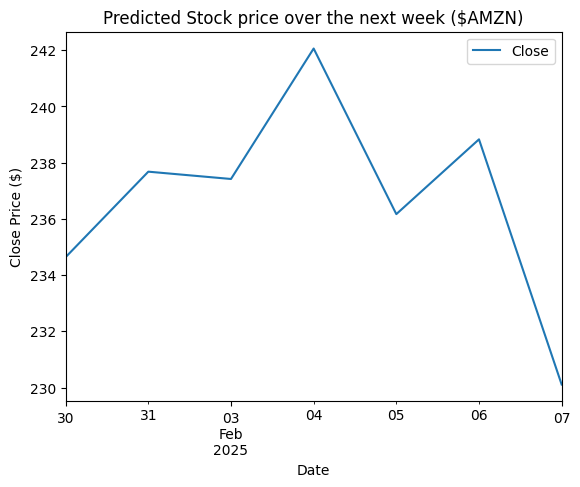

In [58]:
df_history[-7:].plot( y='Close', ylabel='Close Price ($)', title=f'Predicted Stock price over the next week (${ticker})')